# Advanced Python Programming

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/undergradstudent/Research/OOP/')
from plot.blackhole import draw_blackhole, draw_xrb

## Index 
1. Prerequisites
    1. Defining functions
2. Object Oriented Programming (OOP)
    1. Defining a class
    2. Four Pillars of OOP
        1. Inheritance
        2. Polymorphism 
        3. Encapsulation
        4. Abstraction
3. Packages 
4. Debugging 
5. Misc
    1. Decorators
    2. List comprehensions
    3. positional arguments and keyword arguments

6. A little tangent on documentating code


# 1. Prerequisites
In this workshop, I am going to assume that you have had some experience with programming in python. Basically, at most, you need to know how to define a function. Here's a quick example:

In [2]:
# defining functions
def speed(distance, time):
    return f"{distance/time} m/s"

x = speed(10, 2)
x

'5.0 m/s'

# 2. Object Oriented Programming 

## Procedural programming: 

We go on a little detour on Procedural Programming first.

Coding languages: C, Fortran
- **Linear**: Best suited for simple, straight-forward tasks.
- **Structure**: Programs that are structured as a series of functions that call each other. Top-down approach

[Software Engineering Stack Exchange](https://softwareengineering.stackexchange.com/questions/67717/procedural-code-vs-oop-code):
 > Procedural programming is the easiest and the fastest approach when you know EXACTLY what you need and it's not going to change. 


Why it's good and useful:
- **Simple**: Best suited for simple, straight-forward tasks.
- **Logical**: Logical flow of operations on data.

For example:

In [3]:
# An example on procedural way of programming

def find_average(arr):
    '''Find the average of an array of numbers using 
    sum of elements / total number of elements.'''
    total_sum = add(arr)
    total_num = find_length(arr)
    return total_sum / total_num

def add(arr):
    '''Add the elements in an array.'''
    return sum(arr)

def find_length(arr):
    '''Finds the length of an array'''
    return len(arr)

arr = [1, 3, 5, 7, 9]
find_average(arr)

5.0

But it has its downsides...
- **Code duplication**: Can lead to code duplication.
- **Low Reusability**: Difficult to reuse for different data types, mostly built for a specific data structure.
- **Less Modularity**: Difficulty in maintaining large programs

## Object Oriented Programming (OOP)

Focuses on writing modular code, i.e., diving large pieces of code into smaller, independent and manageable modules. 

OOP uses 'objects' to write programs. But, what is an object...? More on that soon!

Coding languages: Python, C++

Why OOP is useful:
- **Modularity**: Focuses on modular code, is easier to debug and maintain
- **Reusability**: Focuses on a bottom-up approach, leads to more reusable code.

Its downsides:
- **We are scientists**: As scientists, we want to do the actual science and get results. Code maintanence is not the priority, doing the science is. 
- **Inefficient for simpler tasks**: It would be a waste of time and effort trying to write OOP code for simple, straightforward tasks.

## Defining a class

A class is a <ins>**blueprint**</ins> for creating objects. It provides a template for your data. Think of classes as a literal classroom. In a classroom, you may find students with different names, different personalities, different hobbies, different majors. These characteristics of those individuals are the `attributes` of those students.

In [4]:
# Syntax for writing a class
class ClassName:
    def __init__(self, attribute1, attribute2):
        '''Initialise a class.'''
        self.attribute1 = attribute1
        self.attribute2 = attribute2

    def method1(self, attribute1, random_parameter):
         # do_something with attribute1 and random_parameter
        pass
    
    def method2(self, attribute2):
        self.method1(attribute2)

In [5]:
# Let's look at how you may have used this with numpy
arr = np.array([1, 2, 3, 4, 5])
arr

array([1, 2, 3, 4, 5])


Let's define a class `Star` that has attributes `ra` for Right Ascension, `dec` for Declination, `mass` for the mass of the star and `age` for the age of the star. Note the use of `self` in the parameters of the class.

In [6]:
class Star:
    def __init__(self, ra, dec, mass, age):
        self.ra = ra                     # Right ascension
        self.dec = dec                   # Declination1
        self.mass = f'{mass} M_sun' 
        self.age = f'{age} Myr'

In [7]:
vega = Star(
    ra=170.058, 
    dec=13.325, 
    mass=2.135,  # solar mass
    age=450      # Million years
)

Vega is now an <ins>object</ins> or <ins>instance of a class</ins>. And `ra`, `dec`, `mass` and `age` are its attributes which we can call.

In [8]:
vega.ra, vega.dec, vega.mass, vega.age

(170.058, 13.325, '2.135 M_sun', '450 Myr')

In [9]:
class Star:
    def __init__(self, name, ra, dec, mass, age, *args, **kwargs):
        '''Method to initialise a star'''
        self.name = name
        self.ra = ra
        self.dec = dec
        self.mass = mass 
        self.age = age
        self.args = args
        self.kwargs = kwargs

    def get_info(self):
        print(f"Object Name : {self.name}")
        print(f"Object RA   : {self.ra}")
        print(f"Object Dec  : {self.dec}")
        print(f"Object Mass : {self.mass}")
        print(f"Object Age  : {self.age}")

    def go_supernova(self):
        '''
        Method that randomly lowers the mass of a star, simulating a supernova
        explosion.
        '''
        print("Boom! <insert loud explosion 💥>")
        rng = np.random.default_rng()
        random_num = rng.uniform(low=0, high=self.mass)
        self.mass = self.mass - random_num

    def draw(self):
        '''A method to draw a star'''
        # Define coordinates for a single star
        x_coordinate = 0.5
        y_coordinate = 0.5

        # Create a scatter plot with a star marker
        plt.scatter(x_coordinate, y_coordinate, s=500, marker='*', color='gold')

        # Set plot limits and labels (optional)
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.title(self.name)
        plt.xlabel("Right Ascension")
        plt.ylabel("Declination")

        # Display the plot
        plt.show()

In [10]:
vega = Star(
    name='Vega',
    ra=170.058, 
    dec=13.325, 
    mass=2.135,  # solar mass
    age=450,     # Million years
)

In [11]:
vega.get_info()

Object Name : Vega
Object RA   : 170.058
Object Dec  : 13.325
Object Mass : 2.135
Object Age  : 450


In [12]:
vega.go_supernova()

Boom! <insert loud explosion 💥>


In [13]:
vega.mass

1.8561699252479287

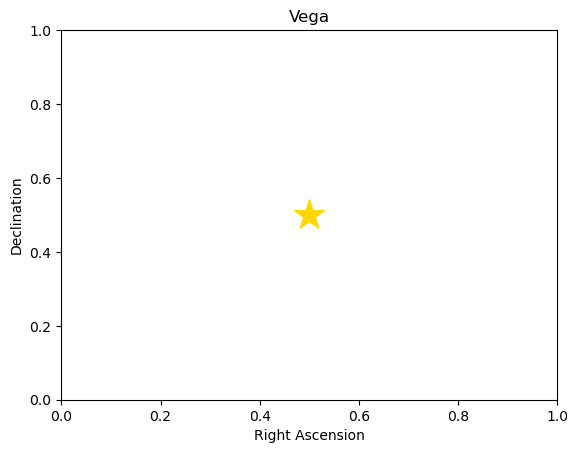

In [14]:
vega.draw()

## Pillars of Object Oriented Programming

1) Inheritance

2) Polymorphism

3) Encapsulation

4) Abstraction

## 1. Inheritance

With inheritance, you can use your original class as a template to create another class. The new class created can have the `attributes` (linked to Polymorphism, see next section) and `methods` of the original class. 

In [15]:
# Child class of the parent class Star
class BlackHole(Star):
    def __init__(self, type, name, ra, dec, mass, age, angular_acceleration, *args, **kwargs):
        # Access the 
        super().__init__(name, ra, dec, mass, age, *kwargs)
        self.type = type
        self.angular_acceleration = angular_acceleration
        self.args = args
        self.kwargs = kwargs

    def draw(self):
        '''A method to draw a black hole'''
        return draw_blackhole()

In [16]:
SagA = BlackHole(type='Black Hole', name='Sagittarius A *', ra=170.2341, dec=12.358, mass=100, age=15000, angular_acceleration=15,
                 flux=15)

In [17]:
SagA.get_info()

Object Name : Sagittarius A *
Object RA   : 170.2341
Object Dec  : 12.358
Object Mass : 100
Object Age  : 15000


/Users/undergradstudent/Research/OOP/plot/blackhole.py:73: RuntimeWarning: invalid value encountered in sqrt
  psivals2 = np.array([[phi(np.sqrt(rs-minrs(b)), b)[0],b] for b in np.linspace(0,bmax,num=steps)])
/Users/undergradstudent/Research/OOP/plot/blackhole.py:30: RuntimeWarning: invalid value encountered in scalar divide
  (x**2+rt) * np.sqrt(-((b**2*(-2+x**2+rt)) / (x**2+rt)) + (x**2+rt)**2)
/Users/undergradstudent/Research/OOP/plot/blackhole.py:40: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(d_phi_dx, np.inf, xi, args=(b,rt))
/Users/undergradstudent/Research/OOP/plot/blackhole.py:74: RuntimeWarning: invalid value encountered in sqrt
  psivals3 = np.array([[phi(-np.sqrt(rs-minrs(b)), b)[0],b] for b in np.linspace(3,bmax,num=steps)])
/Users/undergradstudent/Research/OOP/plot/blackhole.py:87: RuntimeWarning: invalid value encountered in sqrt
  psiva

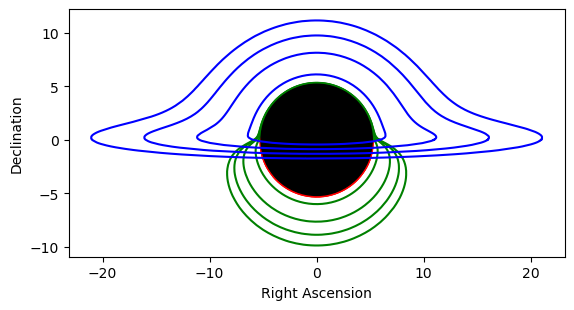

In [18]:
SagA.draw()

But the way that inheritance is done in python, we can also use the `go_supernova` method. But we all know that Black Holes do not undergo supernova explosions

In [19]:
SagA.go_supernova() # Original mass was 100 M_sun
SagA.mass

Boom! <insert loud explosion 💥>


22.621148714149896

In [20]:
# Child class of the class Star
# Child class of the parent class Star
class BlackHole(Star):
    def __init__(self, type, name, ra, dec, mass, age, angular_acceleration, *args, **kwargs):
        # Access the 
        super().__init__(name, ra, dec, mass, age, *kwargs)
        self.type = type
        self.angular_acceleration = angular_acceleration
        self.args = args
        self.kwargs = kwargs

    def draw(self):
        '''A method to draw a black hole'''
        return draw_blackhole()
    
    def go_supernova(self):
        # Override the `go_supernova` method 
        # as black holes do not undergo supernova explosions
        pass 

In [21]:
SagA = BlackHole(type='Black Hole', name='Sagittarius A *', ra=170.2341, dec=12.358, 
                 mass=100, age=15000, angular_acceleration=15)
SagA.go_supernova()
SagA.mass

100

### Multiple inheritances are also possible!

In [22]:
class XrayBinary(BlackHole, Star):
    def __init__(self, type, name, ra, dec, mass, age, **kwargs):
        super().__init__(type, name, ra, dec, mass, age, **kwargs)

    def draw(self):
        return draw_xrb()

In [23]:
xrb = XrayBinary(
    type='Black Hole X-ray Binary',
    name='Random X-ray Binary in the Milky Way',
    ra=170.238,
    dec=30.02223,
    mass=15,
    age=3,
    angular_acceleration=120,
    galaxy_name='Milky Way'
)

In [24]:
xrb.type

'Black Hole X-ray Binary'

/Users/undergradstudent/Research/OOP/plot/blackhole.py:179: RuntimeWarning: invalid value encountered in sqrt
  psivals2 = np.array([[phi(np.sqrt(rs-minrs(b)), b)[0],b] for b in np.linspace(0,bmax,num=steps)])
/Users/undergradstudent/Research/OOP/plot/blackhole.py:136: RuntimeWarning: invalid value encountered in scalar divide
  (x**2+rt) * np.sqrt(-((b**2*(-2+x**2+rt)) / (x**2+rt)) + (x**2+rt)**2)
/Users/undergradstudent/Research/OOP/plot/blackhole.py:146: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(d_phi_dx, np.inf, xi, args=(b,rt))
/Users/undergradstudent/Research/OOP/plot/blackhole.py:180: RuntimeWarning: invalid value encountered in sqrt
  psivals3 = np.array([[phi(-np.sqrt(rs-minrs(b)), b)[0],b] for b in np.linspace(3,bmax,num=steps)])
/Users/undergradstudent/Research/OOP/plot/blackhole.py:193: RuntimeWarning: invalid value encountered in sqrt
  

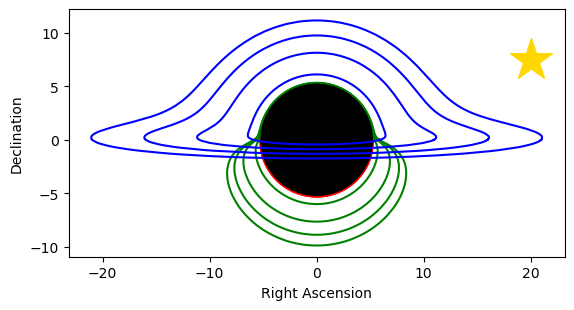

In [25]:
xrb.draw()

## 2. Polymorphism 

Polymorphism originates from an ancient Greek word, derived from the combination of the words 'poly' for many and 'morphe' meaning shapes or forms.  

Python employs polymorphism through 'duck typing'. This means that if an object 'walks like a duck and quacks like a duck", then it can be treated as a duck, regardless of its actual class. 

In other words, if multiple objects have the same method or attribute, then they can be used interchangeably in code that calls that method or accesses that attribute.

In [26]:
def draw(AstroObject):
    '''Draws/Plots the astronomical object.'''
    return AstroObject.draw()

/Users/undergradstudent/Research/OOP/plot/blackhole.py:73: RuntimeWarning: invalid value encountered in sqrt
  psivals2 = np.array([[phi(np.sqrt(rs-minrs(b)), b)[0],b] for b in np.linspace(0,bmax,num=steps)])
/Users/undergradstudent/Research/OOP/plot/blackhole.py:30: RuntimeWarning: invalid value encountered in scalar divide
  (x**2+rt) * np.sqrt(-((b**2*(-2+x**2+rt)) / (x**2+rt)) + (x**2+rt)**2)
/Users/undergradstudent/Research/OOP/plot/blackhole.py:40: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(d_phi_dx, np.inf, xi, args=(b,rt))
/Users/undergradstudent/Research/OOP/plot/blackhole.py:74: RuntimeWarning: invalid value encountered in sqrt
  psivals3 = np.array([[phi(-np.sqrt(rs-minrs(b)), b)[0],b] for b in np.linspace(3,bmax,num=steps)])
/Users/undergradstudent/Research/OOP/plot/blackhole.py:87: RuntimeWarning: invalid value encountered in sqrt
  psiva

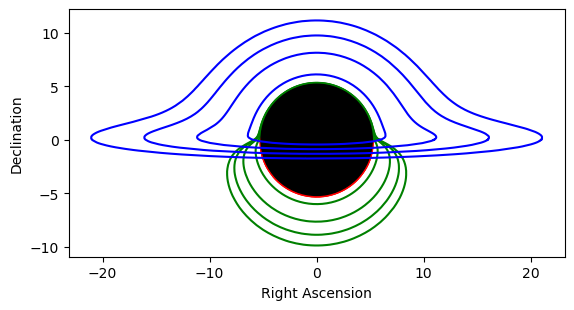

In [27]:
draw(SagA)

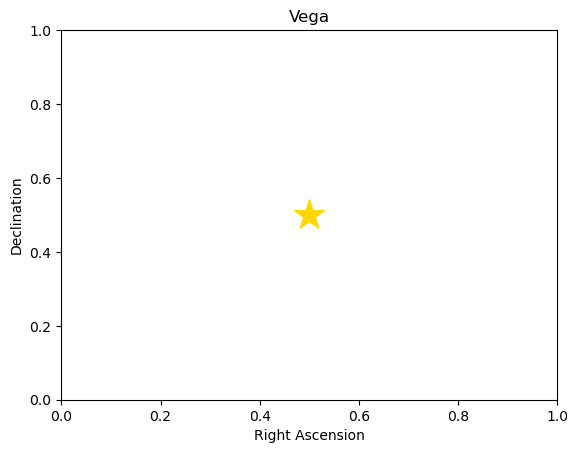

In [28]:
draw(vega)

## 3. Encapsulation

Encapsulation combines attributes and methods that work with the data into a single unit known as a class, as we already saw. This protective layer around the data maintains its integrity and prevents unauthorized access. 

A common analogy for encapsulation is cars! A car has an engine, transmission, the brakes, the steering wheel. We can interact with the car using the steering wheels, accelerator or the brakes, but we don't need to exactly know how they are working. This is the same with encapsulation.

Side Note: Encapsulation is not unique to OOP. You can employ it within procedural programming as well in the form of bundling the procedures as nested functions with the main function.

In [29]:
class Star:
    def __init__(self, name, mass, age):
        '''Method to initialise a star'''
        self.name = name
        self.mass = mass 
        self.age = age

In [30]:
Sirius = Star(name='Sirius', mass=2.063, age=250)

In [31]:
Sirius.age = 300

In [32]:
Sirius.age

300

This is considered illegal in programming in general. In other programming languages, there are better ways to retrict access from users. But, Python, by default, allows users to access all data members. 

This can cause many problems. Say for example, if by a typo, you accidentally recorded the age of a star as -150 Myr, which physically does not make any sense. This can further create further negative implications for the rest of the analysis that you perform with that star. 

To restrict access of data members, python uses setter and getter methods.

In [33]:
class Star:
    def __init__(self, name, mass, age):
        '''Method to initialise a star'''
        self.name = name
        self.mass = mass 
        self.age = age

    def set_age(self, age):
        if age < 0:
            raise ValueError('A Star cannot have an age less than 0!')
        else: 
            self.age = age

    def get_age(self):
        return self.age

In [34]:
Betelgeuse = Star('Betelgeuse', 100, age=100)

In [35]:
Betelgeuse.get_age() # Belegeuse is about 10 million years old

100

In [36]:
Betelgeuse.set_age(10)

In [37]:
Betelgeuse.get_age()

10

In [38]:
Betelgeuse.set_age(-150)

ValueError: A Star cannot have an age less than 0!

To read more about getters and setters, [here](https://www.geeksforgeeks.org/python/getter-and-setter-in-python/)'s a really good blog.

## 4. Abstraction

Abstraction refers to the process of hiding complex details of code implementations and only showing the relevant information to the user. 

Abstraction is primarily achieved through abstract classes and abstract method. However, the abstract class cannot be instantiated directly, but serves as a blueprint for other classes.

By defining abstract methods, you force the subclasses to implement specific functionalities. This ensures a common interface, while also allowing a diverse implementation, specific to the needs of your work.

Python supports Abstraction through abstract classes and methods which you can access using the in-built `abc` library.

In [39]:
from abc import ABC, abstractmethod
from astropy.units import G

In [40]:
class AstroObject(ABC):
    Gravity = G  # Public member
    
    @abstractmethod
    def move(self):
        '''Abstract method to move an astronomical object.'''
        pass

class Star(AstroObject):
    def __init__(self, name, mass):
        self.name = name
        self.mass = mass

    def move(self):
        return f'{self.name} is moving!'
    
    def go_supernova(self):
        print("Boom! <insert loud explosion 💥>")
        rng = np.random.default_rng()
        random_num = rng.uniform(low=0, high=self.mass)
        self.mass = self.mass - random_num
        
class BlackHole(AstroObject):
    def __init__(self, name, mass):
        self.name = name
        self.mass = mass

    def move(self):
        return f'{self.name} is moving!'
    
    def accrete(self):
        '''A basic simulation of a black hole accreting matter.'''
        rng = np.random.default_rng()
        random_num = rng.uniform(low=0, high=self.mass)
        self.mass = self.mass + random_num

In [41]:
ProximaCentauri = Star('Proxima Centauri', mass = 4853)

In [42]:
ProximaCentauri.move()

'Proxima Centauri is moving!'

In [43]:
ProximaCentauri.go_supernova()
ProximaCentauri.mass

Boom! <insert loud explosion 💥>


4360.4458623456585

In [44]:
M87 = BlackHole(name='M87', mass=6.5e9)

In [45]:
M87.accrete()
M87.mass

7362849870.639045

To learn more about abstraction, check out [abstraction](https://www.mygreatlearning.com/blog/abstraction-in-python/)

# 3. Packages

While creating pip-installable packages takes some effort, creating packages that you can use within your local computer rather than copy-pasting your code to all the directories where you work is very, very, very easy. 

First, we need a file named `__init__.py` in all the levels of the directory. We need to include this file to make a package importable. Also, this file helps streamline the package calls (e.g `import numpy as np`) and helps avoid conflicts.

|--- oop.ipynb

plot/ <br>
|---- `__init__`.py <br>
|---- blackhole.py <br>

other_code/ <br>
|---- `__init__`.py <br>
|---- addition.py <br>
|---- multiplication.py <br>

Normally, you would not be allowed to gain access to the code either in the `plot` or `other_code` directory. But you can do so with the help of the `sys` module. 

In [46]:
import sys # helps you talk with your computer
sys.path.insert(0, '/Users/undergradstudent/Research/OOP/')

In [47]:
from other_code.addition import add

x = add(5, 10)
print(x)

from other_code.multiplication import multiply
y = multiply(5, 10)
print(y)

15
50


# 4. Debugging

![Alt text](/Users/undergradstudent/Research/OOP/code.png)

# 5. Misc

## 1. Decorators

Decorators help add extra functionality to your code by allowing to add code before, after or also instead of the original code's function logic. Decorators, also known as wrappers, help to modify the implementation of your original code. 

In [48]:
# Example taken from https://www.geeksforgeeks.org/python/decorators-in-python/

# A simple decorator function
def decorator(func):
    def wrapper():
        print("Before calling the function.")
        func()
        print("After calling the function.")
    return wrapper

# Applying the decorator to a function
@decorator
def greet():
    print("Hello, World!")

greet()


Before calling the function.
Hello, World!
After calling the function.


Say I have a bunch of code with a very big implementation, which takes a lot of time to compute. I want to add the functionality, where the code tells me how much time it took to run that code. I can add a decorator for that:

In [63]:
import time
def time_code(func):
    '''A decorator to time the run time of your code'''
    def wrapper():
        start_time = time.time()
        func()
        end_time = time.time()
        print(f"Time for code execution: {end_time - start_time}")
    return wrapper


In [64]:
@time_code
def draw_black_hole():
    '''Code to draw a black hole'''
    draw_blackhole()

/Users/undergradstudent/Research/OOP/plot/blackhole.py:73: RuntimeWarning: invalid value encountered in sqrt
  psivals2 = np.array([[phi(np.sqrt(rs-minrs(b)), b)[0],b] for b in np.linspace(0,bmax,num=steps)])
/Users/undergradstudent/Research/OOP/plot/blackhole.py:30: RuntimeWarning: invalid value encountered in scalar divide
  (x**2+rt) * np.sqrt(-((b**2*(-2+x**2+rt)) / (x**2+rt)) + (x**2+rt)**2)
/Users/undergradstudent/Research/OOP/plot/blackhole.py:40: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(d_phi_dx, np.inf, xi, args=(b,rt))
/Users/undergradstudent/Research/OOP/plot/blackhole.py:74: RuntimeWarning: invalid value encountered in sqrt
  psivals3 = np.array([[phi(-np.sqrt(rs-minrs(b)), b)[0],b] for b in np.linspace(3,bmax,num=steps)])
/Users/undergradstudent/Research/OOP/plot/blackhole.py:87: RuntimeWarning: invalid value encountered in sqrt
  psiva

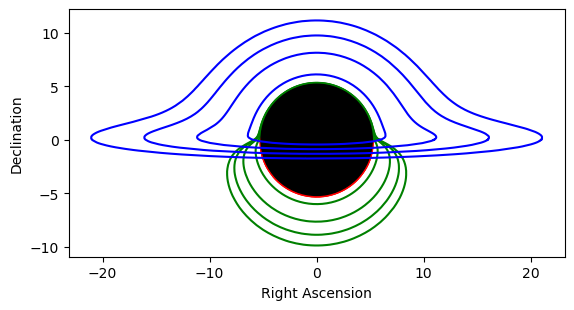

Time for code execution: 16.675790071487427


In [65]:
draw_black_hole()

## 2. List comprehensions

List comprehensions are basically for-loops for creating lists, but much, much, much faster than for-loops.

In [66]:
list_a = []
for i in range(100000):
    list_a.append(i)

list_a

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [67]:
list_b = [i for i in range(100000) if i != 20]
list_b

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,

In [70]:
list_c = [i for i in range(10000) if i % 1000== 0] 
list_c

[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

## 3. Positional and keyword arguments

In [75]:
x = np.random.randint(1, 1001, size=10)

(array([1., 0., 1., 2., 1., 0., 1., 1., 1., 2.]),
 array([ 19. ,  98.2, 177.4, 256.6, 335.8, 415. , 494.2, 573.4, 652.6,
        731.8, 811. ]),
 <BarContainer object of 10 artists>)

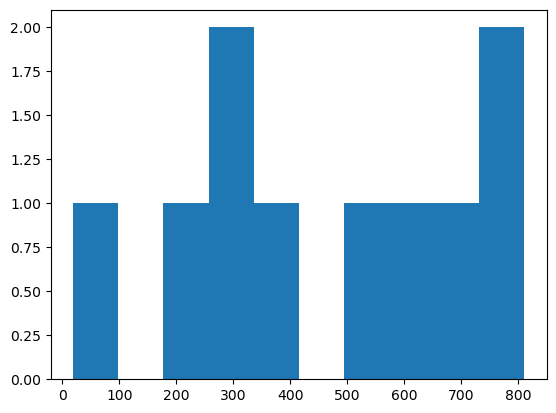

In [76]:
plt.hist(x)

In [78]:
def plot_histogram(x, *args, **kwargs):
    # some more code here
    plt.hist(x, *args, **kwargs)
    # some more code here
    plt.show()

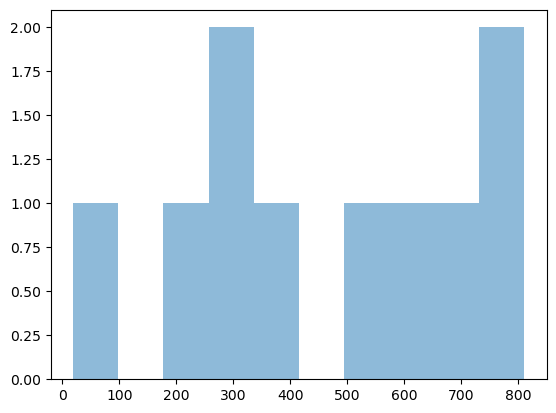

In [89]:
plot_histogram(
    x, 
    10,  # equivalent to bins=10
    alpha=0.5,
    # histtype='step'
)

# 6. Code documentation

Check out [Python code packaging for scientific software](https://pythonpackaging.info/index.html) by Jo Bovy for more information on code packing and documentation.


Generally, there are two standard ways of Python code documentation: Google and Numpy. In this workshop, we will be looking at the code documentation standard of numpy.

You can document code through 2 ways: 

1. docstrings: Will be used to generate documentation like [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
2. inline comments: Will not show when you create a documentation

In [ ]:
class ClassName:
    '''An example class to show how docstrings work.
    
    Parameters
    ----------
    attribute 1 : datatype(s)
        Some useful information about the parameter.
    attribute 2 : datatype(s)
        Some useful information about the parameter   

    Returns
    -------
     object : ClassName object that does something
    '''
    def __init__(self, attribute1, attribute2):
        '''A method to initializes an object of a class'''
        pass

    def method(self, attribute2):
        '''A method that does something'''
        # do something with attribute 2
        pass